In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from env import host, user, password
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from math import sqrt
from statsmodels.formula.api import ols

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 


import wrangle3
import explore

In [2]:
train, X_train, y_train, X_validate, y_validate, X_test, y_test=wrangle3.wrangle()


In [3]:
explore.taxvaluedollarcnt_corr()

 The correlation between the taxvaluedollarcnt of a home and the the logerror: -0.00
 The P value between the taxvaluedollarcnt of a home and the logerror:  0.43
 
Fail to reject the null hypothesis.


In [4]:
X_train['taxvaluedollarcnt']

21580    131090.00000
32781   2449943.00000
33161    347000.00000
45785    875355.00000
45820    327623.00000
             ...     
14404     99623.00000
1276     275873.00000
34315    959303.00000
24599    101605.00000
14306    714211.00000
Name: taxvaluedollarcnt, Length: 36384, dtype: float64

# Cluster 1: Area

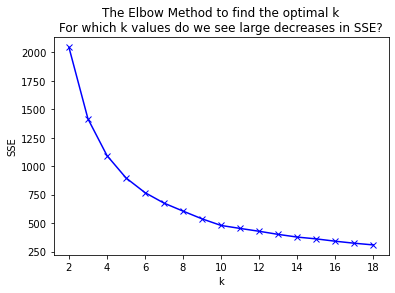

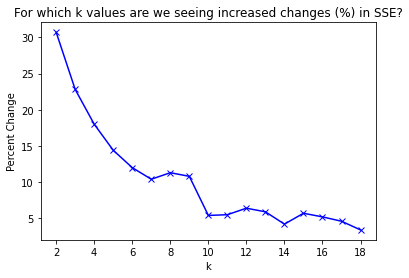

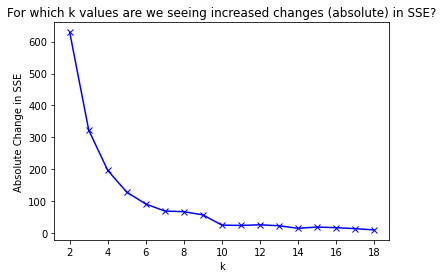

,k,sse,delta,pct_delta
0,2,2044.68241,629.00000,30.70000
1,3,1416.03305,323.00000,22.80000
2,4,1093.32874,197.00000,18.00000
3,5,896.72672,129.00000,14.40000
4,6,767.40170,92.00000,12.00000
5,7,675.17011,70.00000,10.40000
6,8,605.10876,68.00000,11.30000
7,9,536.90444,58.00000,10.80000
8,10,478.98662,26.00000,5.40000
9,11,452.88989,25.00000,5.50000


In [5]:
# Our first cluster - Area
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'
k_range = range(2,20)
explore.find_k(X_train, cluster_vars, k_range)

In [6]:
# talk to Jared about mapping area on google maps API

# Cluster 2 : Size

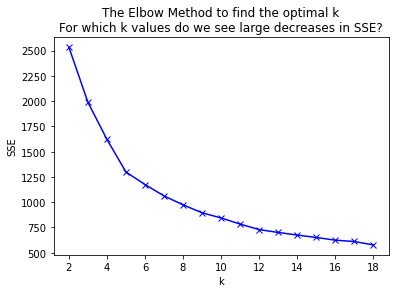

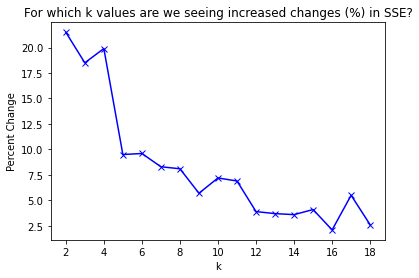

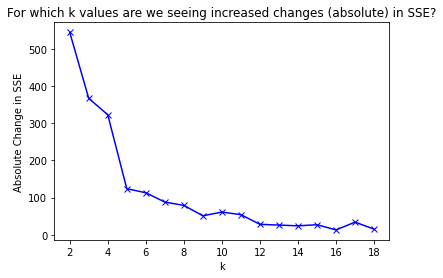

,k,sse,delta,pct_delta
0,2,2533.74932,545.00000,21.50000
1,3,1988.74336,367.00000,18.50000
2,4,1621.47775,323.00000,19.90000
3,5,1298.50716,124.00000,9.50000
4,6,1174.95554,113.00000,9.60000
5,7,1061.94293,88.00000,8.30000
6,8,974.13014,79.00000,8.10000
7,9,894.96926,51.00000,5.70000
8,10,844.27566,61.00000,7.20000
9,11,783.18470,54.00000,6.90000


In [7]:
# 2nd cluster - Size
cluster_vars = ['scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio']
cluster_name = 'size_cluster'
#k_range = range(2,20)

explore. find_k(X_train, cluster_vars, k_range)

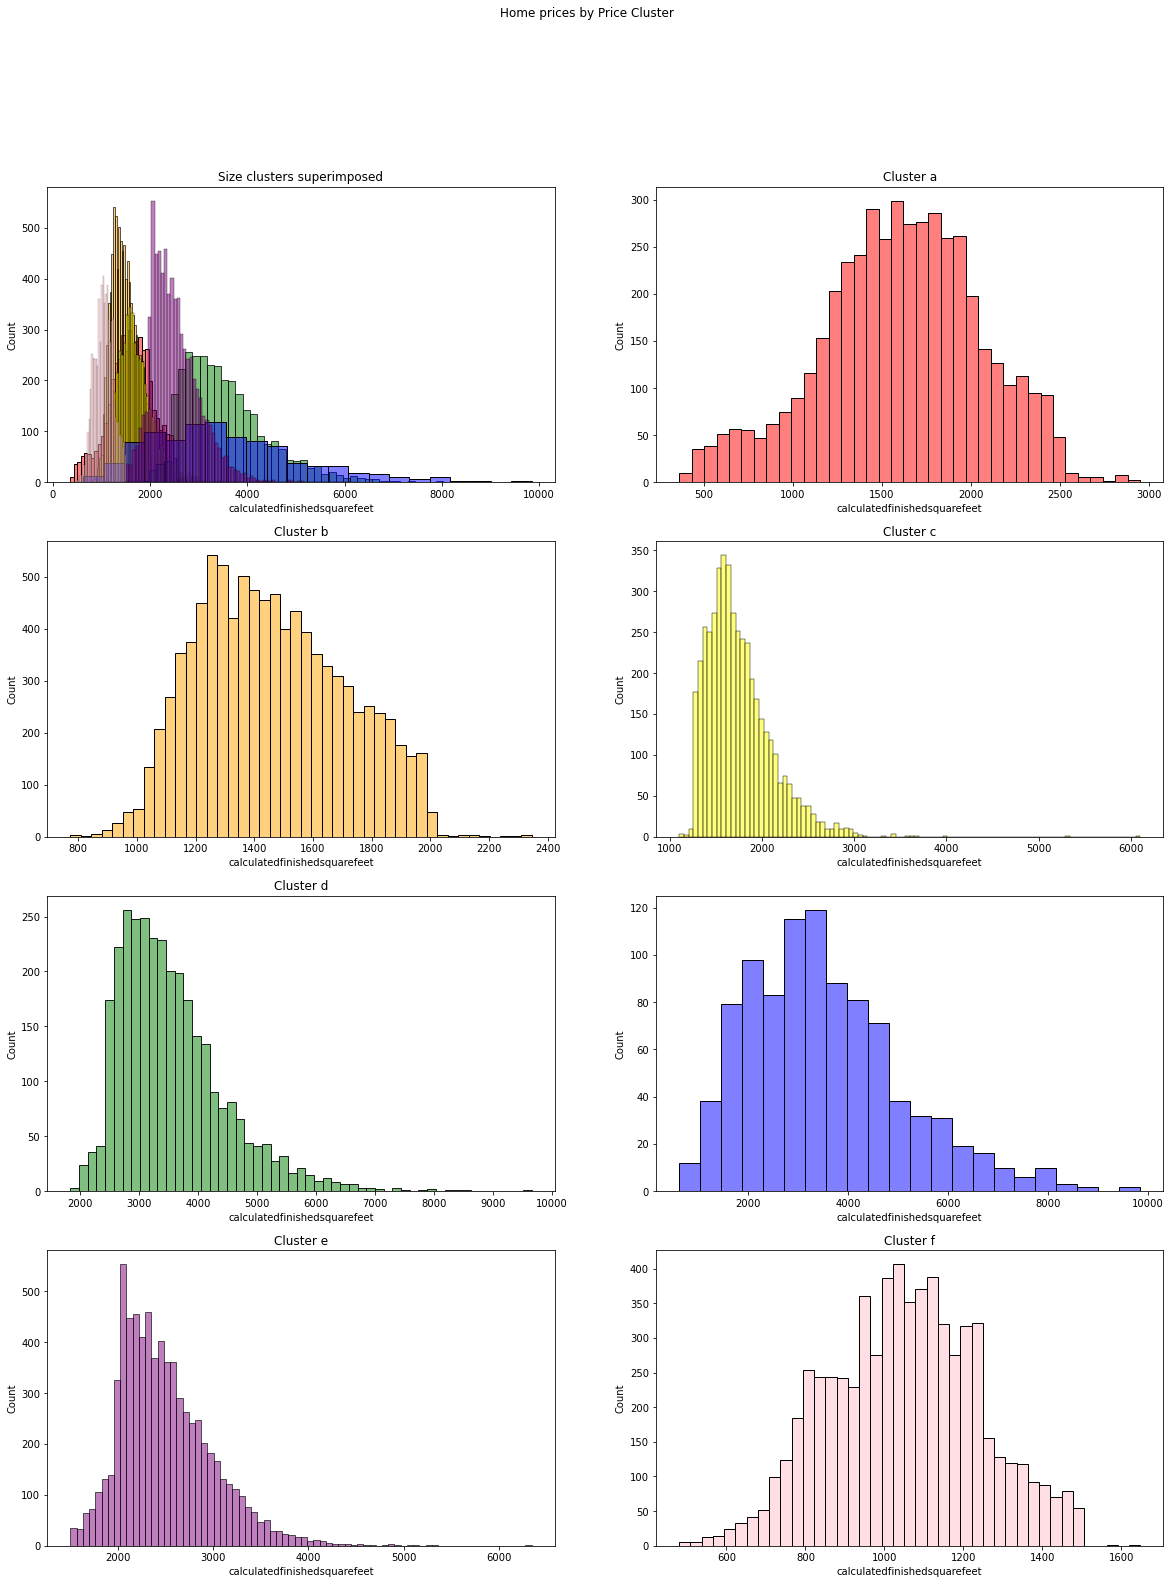

In [8]:
explore.plot_size_clusters()

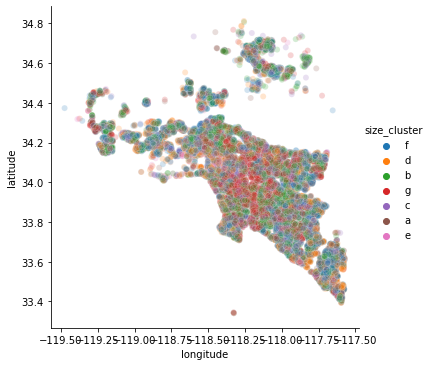

In [9]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='size_cluster', alpha =0.2);

# Cluster 3: Price

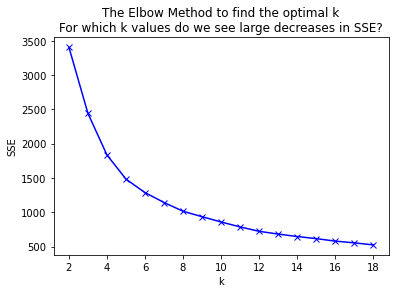

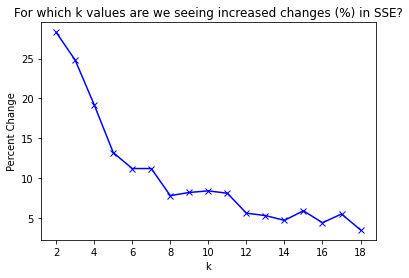

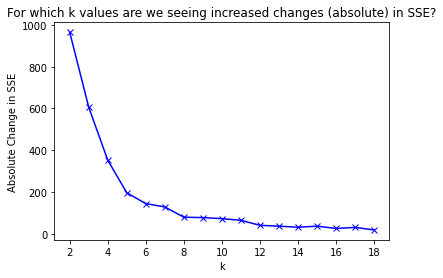

,k,sse,delta,pct_delta
0,2,3405.13436,965.00000,28.30000
1,3,2440.55213,606.00000,24.80000
2,4,1834.13143,352.00000,19.20000
3,5,1482.06801,196.00000,13.20000
4,6,1285.76056,144.00000,11.20000
5,7,1141.56724,128.00000,11.20000
6,8,1013.85701,79.00000,7.80000
7,9,934.47077,77.00000,8.20000
8,10,857.57343,72.00000,8.40000
9,11,785.41608,64.00000,8.10000


In [10]:
#3rd cluster - Price
cluster_vars = ['taxrate', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin']
cluster_name = 'price_cluster'

explore.find_k(X_train, cluster_vars, k_range)

In [44]:
X_train.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate,scaled_bedroomcnt,scaled_lotsizesquarefeet,scaled_age,scaled_acres,scaled_bath_bed_ratio,scaled_calculatedfinishedsquarefeet,area_cluster,size_cluster,price_cluster,area_cluster_la_newer,area_cluster_la_older,area_cluster_northwest_costal,area_cluster_palmdale_landcaster,area_cluster_santa_clarita,area_cluster_se_coast,size_cluster_a,size_cluster_b,size_cluster_c,size_cluster_d,size_cluster_e,size_cluster_f,size_cluster_g,price_cluster_a,price_cluster_b,price_cluster_c,price_cluster_d,price_cluster_e
21580,21580,11204960,3.00000,4.00000,2000.00000,6037.00000,34.56170,-118.08275,6999.00000,40227.00000,3101.00000,97328.00000,1987.00000,104877.00000,131090.00000,26213.00000,2623.93000,Los_Angeles,30.00000,0.20000,2.00162,0.16067,0.20000,0.40000,52.43850,0.20000,3.74525,0.10000,0.75000,0,"(-0.05, 0.05]",0.01791,0.82963,0.73177,0.33333,0.20338,0.50000,0.00883,0.21324,0.00883,0.19643,0.17285,palmdale_landcaster,f,c,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
32781,32781,14323862,6.00000,6.00000,7393.00000,6059.00000,33.60152,-117.84523,24000.00000,40009.00000,1286.00000,96975.00000,1995.00000,1556016.00000,2449943.00000,893927.00000,29921.84000,Orange,22.00000,0.20000,1.22133,0.55096,0.40000,0.90000,210.47153,0.60000,37.24696,0.30000,1.00000,0,"(0.05, 0.2]",0.01791,0.17714,0.85659,0.83333,0.12372,0.83333,0.03101,0.15441,0.03101,0.28571,0.74125,se_coast,d,a,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
33161,33161,12205584,2.00000,3.00000,1778.00000,6037.00000,33.96600,-118.29863,4948.00000,12447.00000,3101.00000,96025.00000,1936.00000,87000.00000,347000.00000,260000.00000,4248.21000,Los_Angeles,81.00000,0.60000,1.22427,0.11359,0.10000,0.40000,48.93138,0.10000,52.54648,0.40000,0.66667,1,"(-0.05, 0.05]",0.01791,0.42483,0.61833,0.16667,0.12402,0.33333,0.00615,0.58824,0.00615,0.16667,0.14945,la_older,b,d,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
45785,45785,12078527,3.00000,4.00000,2777.00000,6037.00000,34.16601,-118.21853,9989.00000,45457.00000,3101.00000,96327.00000,1990.00000,322342.00000,875355.00000,553013.00000,9603.39000,Los_Angeles,27.00000,0.20000,1.09709,0.22932,0.20000,0.60000,116.07562,0.40000,55.36220,0.40000,0.75000,0,"(0.05, 0.2]",0.01791,0.56074,0.66042,0.33333,0.11104,0.50000,0.01273,0.19118,0.01273,0.19643,0.25474,santa_clarita,f,a,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
45820,45820,14266520,3.00000,4.00000,1939.00000,6059.00000,33.70670,-117.89868,6028.00000,47568.00000,1286.00000,97004.00000,1971.00000,139321.00000,327623.00000,188302.00000,3923.98000,Orange,46.00000,0.33300,1.19771,0.13838,0.10000,0.40000,71.85199,0.20000,31.23789,0.30000,0.75000,0,"(-0.05, 0.05]",0.01791,0.24862,0.82851,0.33333,0.12131,0.50000,0.00756,0.33088,0.00756,0.19643,0.16642,se_coast,f,d,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


count   36384.00000
mean        0.34323
std         0.47479
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: price_cluster_d, dtype: float64

count   36384.00000
mean        0.00173
std         0.04158
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: price_cluster_e, dtype: float64

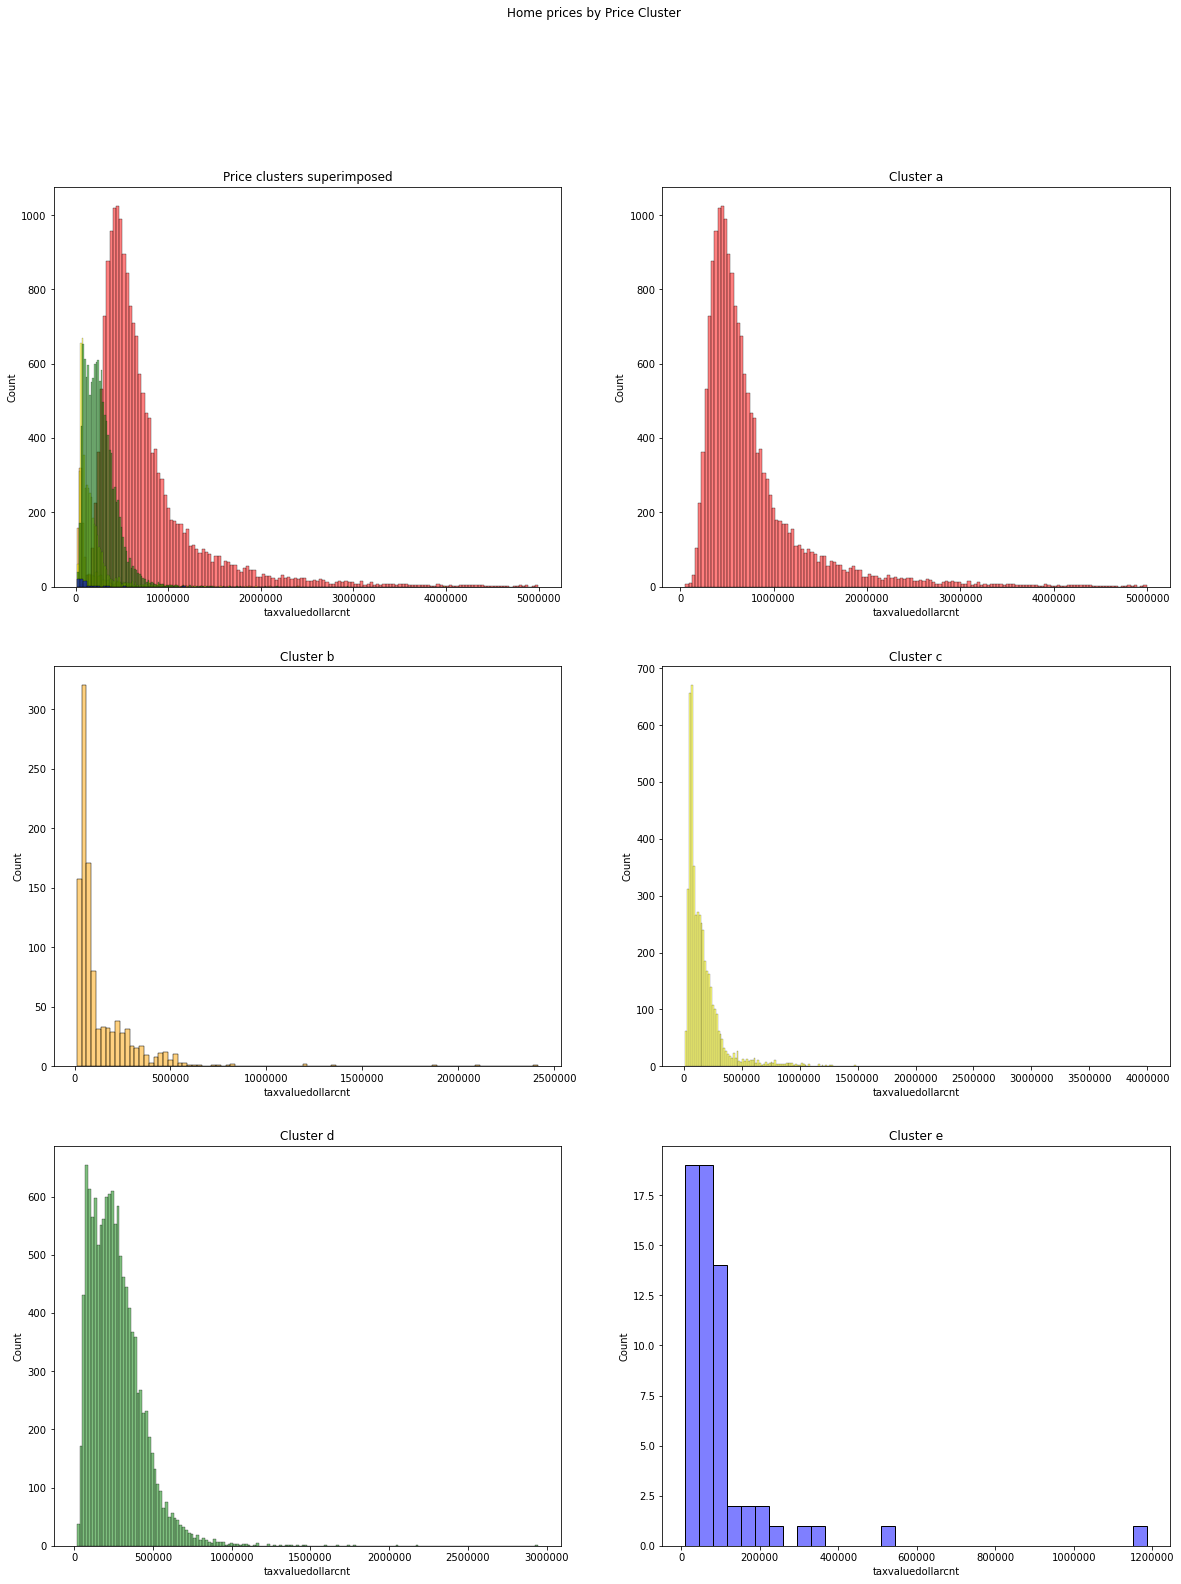

In [41]:
explore.plot_prices_clusters()

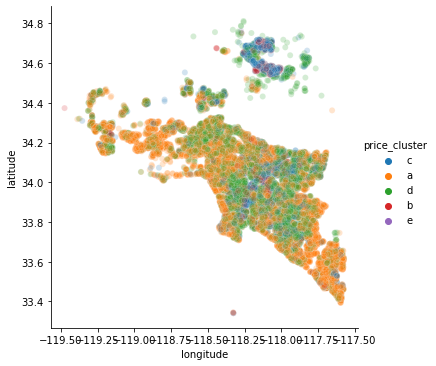

In [12]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='price_cluster', alpha =0.2);

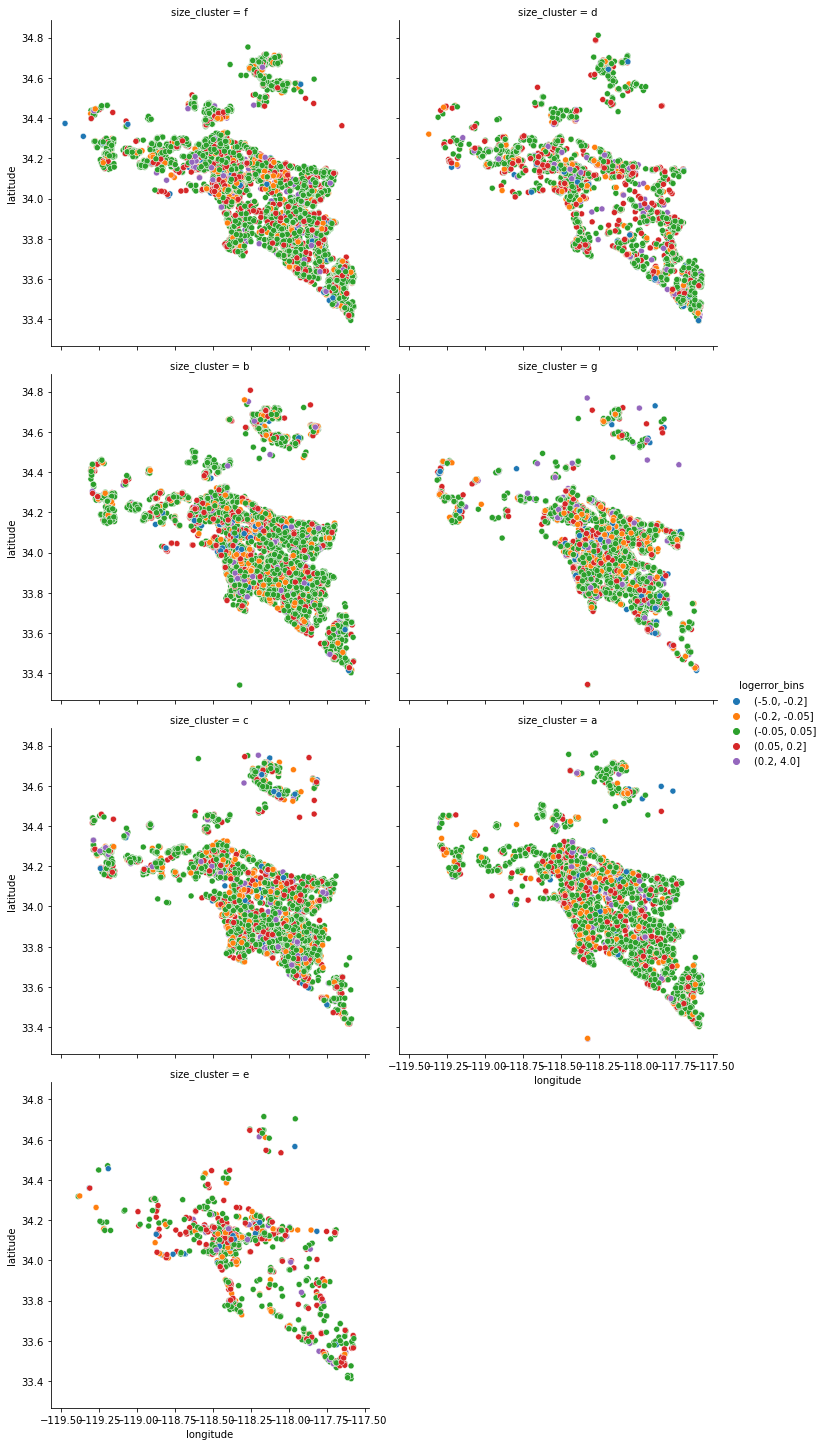

In [18]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='logerror_bins', col='size_cluster', col_wrap=2);

# Cluster 4 : Tax

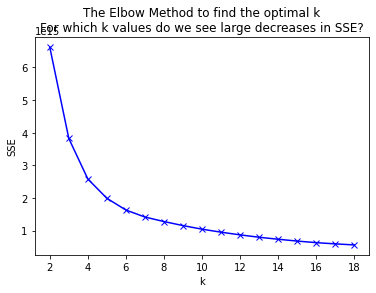

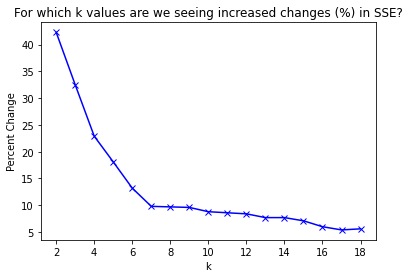

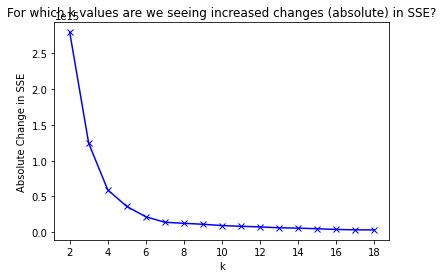

,k,sse,delta,pct_delta
0,2,6619195678852811.00000,2796837576628142.00000,42.30000
1,3,3822358102224669.50000,1241732705036158.00000,32.50000
2,4,2580625397188511.00000,591318396373470.00000,22.90000
3,5,1989307000815040.75000,359243537352986.00000,18.10000
4,6,1630063463462054.75000,215266530457846.00000,13.20000
5,7,1414796933004208.50000,138357013023054.00000,9.80000
6,8,1276439919981155.00000,123687696296267.00000,9.70000
7,9,1152752223684888.25000,110264851600516.00000,9.60000
8,10,1042487372084371.87500,92004900407318.00000,8.80000
9,11,950482471677054.12500,82195502351590.00000,8.60000


In [33]:
cluster_vars = ['taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']
cluster_name = 'tax_cluster'
k_range = range(2,20)

explore.find_k(X_train, cluster_vars, k_range)

In [36]:
X_train['tax_cluster'] = kmeans.predict(X_train[cluster_vars])
X_validate['tax_cluster'] = kmeans.predict(X_validate[cluster_vars])

NameError: name 'kmeans' is not defined

In [38]:
def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 13)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans

In [40]:
def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df

In [39]:
k=5
cluster_name = 'tax_cluster'
cluster_vars = ['taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']

# fit kmeans 
kmeans = create_clusters(X_train, k, cluster_vars)
kmeans = create_clusters(X_validate, k, cluster_vars)

# get centroid values per variable per cluster
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

NameError: name 'get_centroids' is not defined

In [35]:
t0 =X_train[X_train['tax_cluster']==0]
t1 =X_train[X_train['tax_cluster']==1]
t2 =X_train[X_train['tax_cluster']==2]
t3 =X_train[X_train['tax_cluster']==3]
t4 =X_train[X_train['tax_cluster']==4]
t5 =X_train[X_train['tax_cluster']==5]

KeyError: 'tax_cluster'

In [26]:
k=5
cluster_name = 'tax_cluster'
cluster_vars = ['taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']
# fit kmean
kmeans = create_clusters(X_train, k, cluster_vars)
kmeans = create_clusters(X_validate, k, cluster_vars)
# get centroid values per variable per cluster
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)


NameError: name 'create_clusters' is not defined

In [ ]:
X_train[‘price_cluster’] = kmeans.predict(X_train[cluster_vars])
X_validate[‘price_cluster’] = kmeans.predict(X_validate[cluster_vars])

In [14]:
def find_k(X_train, cluster_vars, k_range):
    #enter clusters/features, cluster_name, & range    
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

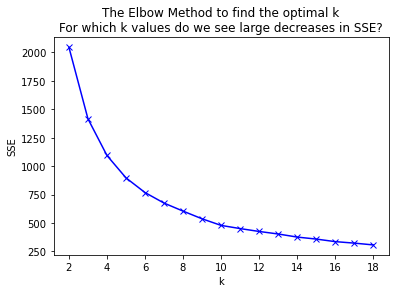

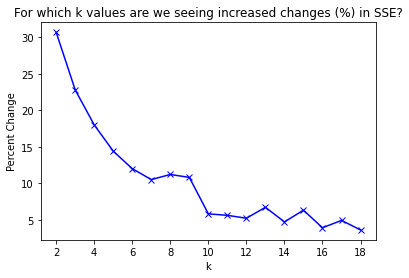

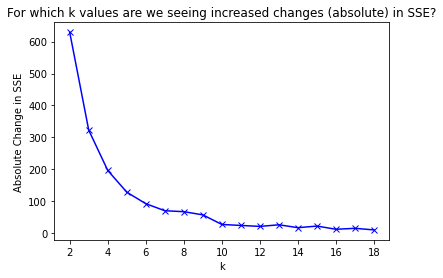

,k,sse,delta,pct_delta
0,2,2044.64659,629.00000,30.70000
1,3,1416.03067,323.00000,22.80000
2,4,1093.33197,197.00000,18.00000
3,5,896.72836,129.00000,14.40000
4,6,767.66928,93.00000,12.00000
5,7,675.16738,71.00000,10.50000
6,8,604.57220,68.00000,11.20000
7,9,536.90475,58.00000,10.80000
8,10,478.98580,28.00000,5.80000
9,11,451.04720,25.00000,5.60000


In [15]:
# Our first cluster - Area
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'
k_range = range(2,20)
find_k(X_train, cluster_vars, k_range)

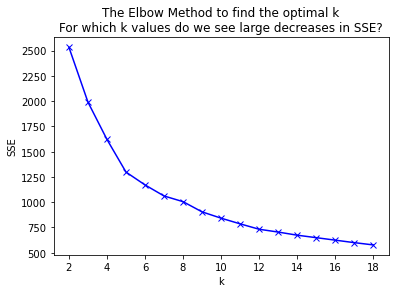

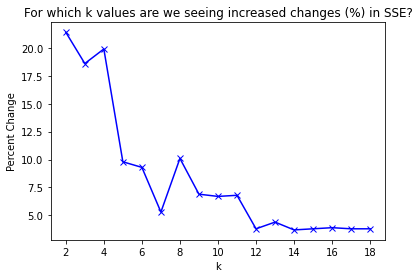

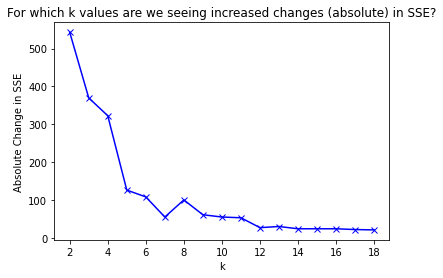

,k,sse,delta,pct_delta
0,2,2533.74932,543.00000,21.40000
1,3,1990.78465,370.00000,18.60000
2,4,1621.06451,323.00000,19.90000
3,5,1298.06644,127.00000,9.80000
4,6,1170.82432,109.00000,9.30000
5,7,1061.48992,56.00000,5.30000
6,8,1005.05833,101.00000,10.10000
7,9,903.98485,62.00000,6.90000
8,10,841.60920,56.00000,6.70000
9,11,785.54146,54.00000,6.80000


In [16]:
# 2nd cluster - Size
cluster_vars = ['scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio']
cluster_name = 'size_cluster'
#k_range = range(2,20)

find_k(X_train, cluster_vars, k_range)

NameError: name 's0' is not defined

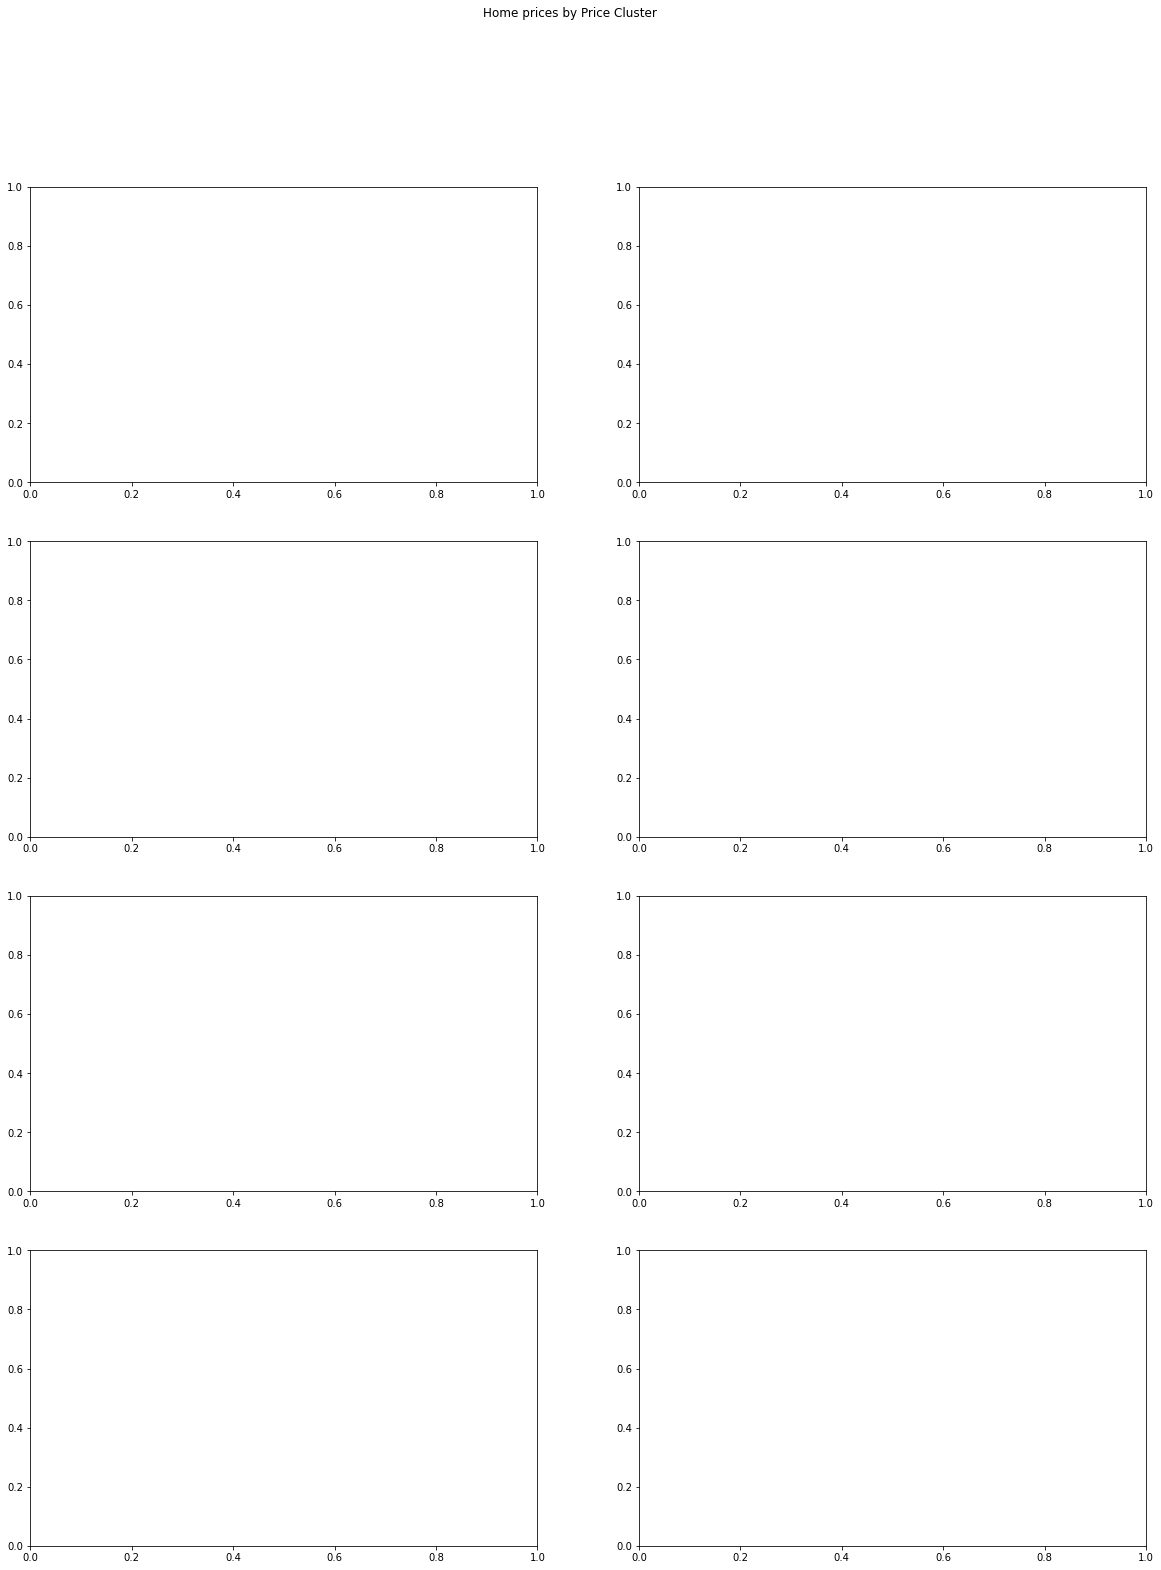

In [17]:

#Plot size clusters
fig, axes = plt.subplots(4,2, sharex=False, figsize=(20, 25))
fig.suptitle('Home prices by Price Cluster')
#axes[0].set_title('All clusters together')
#axes[1].set_title('Cluster a')
#axes[2].set_title('Cluster b')
#axes[3].set_title('Cluster c')
#axes[4].set_title('Cluster d')
#axes[5].set_title('Cluster e')
sns.histplot(data=s0, x='calculatedfinishedsquarefeet', alpha=0.5, color='red', ax=axes[0,0])
sns.histplot(data=s1, x='calculatedfinishedsquarefeet', alpha=0.5, color='orange', ax=axes[0,0])
sns.histplot(data=s2, x='calculatedfinishedsquarefeet', alpha=0.5, color='yellow', ax=axes[0,0])
sns.histplot(data=s3, x='calculatedfinishedsquarefeet', alpha=0.5, color='green', ax=axes[0,0])
sns.histplot(data=s4, x='calculatedfinishedsquarefeet', alpha=0.5, color='blue', ax=axes[0,0])
sns.histplot(data=s5, x='calculatedfinishedsquarefeet', alpha=0.5, color='purple', ax=axes[0,0])
sns.histplot(data=s6, x='calculatedfinishedsquarefeet', alpha=0.5, color='pink', ax=axes[0,0])
axes[0,0].ticklabel_format(style='plain')
axes[0,0].set_title('Size clusters superimposed')
axes[0,1].ticklabel_format(style='plain')
axes[0,1].set_title('Cluster a')

axes[1,0].ticklabel_format(style='plain')
axes[1,0].set_title('Cluster b')
axes[1,1].ticklabel_format(style='plain')
axes[1,1].set_title('Cluster c')
axes[2,0].ticklabel_format(style='plain')
axes[2,0].set_title('Cluster d')
axes[3,0].ticklabel_format(style='plain')
axes[3,0].set_title('Cluster e')
axes[3,1].ticklabel_format(style='plain')
axes[3,1].set_title('Cluster f')

sns.histplot(data=s0, x='calculatedfinishedsquarefeet', alpha=0.5, color='red', ax=axes[0,1])
sns.histplot(data=s1, x='calculatedfinishedsquarefeet', alpha=0.5, color='orange', ax=axes[1,0])
sns.histplot(data=s2, x='calculatedfinishedsquarefeet', alpha=0.5, color='yellow', ax=axes[1,1])
sns.histplot(data=s3, x='calculatedfinishedsquarefeet', alpha=0.5, color='green', ax=axes[2,0])
sns.histplot(data=s4, x='calculatedfinishedsquarefeet', alpha=0.5, color='blue', ax=axes[2,1])
sns.histplot(data=s5, x='calculatedfinishedsquarefeet', alpha=0.5, color='purple', ax=axes[3,0])
sns.histplot(data=s6, x='calculatedfinishedsquarefeet', alpha=0.5, color='pink', ax=axes[3,1])

plt.ticklabel_format(style='plain')

plt.show()

In [ ]:
#3rd cluster - Price
cluster_vars = ['taxrate', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin']
cluster_name = 'price_cluster'
k_range = range(2,20)

find_k(X_train, cluster_vars, k_range)

In [ ]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='age', col='price_cluster', col_wrap=2);


In [ ]:
X_train['price_cluster'].value_counts()

In [ ]:
#using all three moving forward so just implement the function

In [27]:
train['logerror']

21580   -0.01503
32781    0.15846
33161   -0.01774
45785    0.06685
45820   -0.02213
          ...   
14404    0.03122
1276     0.09111
34315   -0.01855
24599    0.18463
14306   -0.02481
Name: logerror, Length: 36384, dtype: float64

In [28]:
# Create Model
ols_model5 = ols(formula='log_error ~ area_cluster_la_newer + area_cluster_la_older + area_cluster_northwest_costal + area_cluster_palmdale_landcaster + area_cluster_santa_clarita + area_cluster_se_coast + size_cluster_a + size_cluster_b + size_cluster_c + size_cluster_d + size_cluster_e + size_cluster_f + size_cluster_g + price_cluster_a + price_cluster_b + price_cluster_c + price_cluster_d + price_cluster_e + taxvaluedollarcnt + structuretaxvaluedollarcnt + taxvaluedollarcnt + landtaxvaluedollarcnt', data=train).fit()

# Make predictions
ols5_yhat = ols_model5.predict(X_train)
X_train['mvp_prdictions']=ols5_yhat
ols_eval['ols5_yhat']=ols5_yhat

ols5_validate_yhat = ols_model5.predict(X_validate)
X_validate['ols5_prdictions']=ols5_validate_yhat

PatsyError: Error evaluating factor: NameError: name 'log_error' is not defined
    log_error ~ area_cluster_la_newer + area_cluster_la_older + area_cluster_northwest_costal + area_cluster_palmdale_landcaster + area_cluster_santa_clarita + area_cluster_se_coast + size_cluster_a + size_cluster_b + size_cluster_c + size_cluster_d + size_cluster_e + size_cluster_f + size_cluster_g + price_cluster_a + price_cluster_b + price_cluster_c + price_cluster_d + price_cluster_e + taxvaluedollarcnt + structuretaxvaluedollarcnt + taxvaluedollarcnt + landtaxvaluedollarcnt
    ^^^^^^^^^

In [30]:
baseline_RMSE = (sqrt(mean_squared_error(ols_eval.actual, ols_eval.baseline_yhat)))
ols_RMSE = (sqrt(mean_squared_error(ols_eval.actual, ols_eval.ols_yhat)))
ols5_RMSE = (sqrt(mean_squared_error(ols_eval.actual, ols_eval.ols5_yhat)))
pct_change_baseline=(((ols5_RMSE-baseline_RMSE)/baseline_RMSE)*100)
pct_change_last_model=(((ols5_RMSE-ols_RMSE)/ols_RMSE)*100)
rmse_validate = (sqrt(mean_squared_error(validate_eval.actual, validate_eval.ols5_yhat)))
baseline_r2 = (r2_score(ols_eval.actual, ols_eval.baseline_yhat))
ols5_train_r2 = (r2_score(ols_eval.actual, ols_eval.ols5_yhat))
ols5_validate_r2 = (r2_score(validate_eval.actual, validate_eval.ols5_yhat))
# Display findings
print(f'My model has value: {ols_RMSE < baseline_RMSE}')
print(f'My model beats previous model: {ols5_RMSE < ols_RMSE}')
print()
print(f'Baseline RMSE: {baseline_RMSE}')
print(f'Model 1 RMSE: {ols_RMSE}')
print(f'Current model train RMSE: {ols5_RMSE}')
print(f'Current model validate RMSE: {rmse_validate}')
print()
print(f'Current model train RMSE difference from baseline: {baseline_RMSE- ols5_RMSE}')
print(f'Current model validate RMSE difference from baseline: {baseline_RMSE- rmse_validate}')
print()

print(f'Current model RMSE difference from best model: {ols5_RMSE- ols_RMSE}')
print()

print(f'RMSE difference train to validate: {ols2_RMSE- rmse_validate}')
print(f'Current model baseline RMSE improvement: {pct_change_baseline}%')
print(f'Current model RMSE improvement from last model: {pct_change_last_model}%')
print()
print(f'Baseline R2: {baseline_r2}')
print(f'Model train  R2: {ols3_train_r2}')
print(f'Model Validate R2: {ols5_validate_r2}')

NameError: name 'ols_eval' is not defined

In [31]:
# Create Model
ols_model4 = ols(formula='log_error ~ taxvaluedollarcnt + structuretaxvaluedollarcnt + taxvaluedollarcnt + landtaxvaluedollarcnt + acres + age', data=train).fit()

# Make predictions
ols4_yhat = ols_model4.predict(X_train)
ols_eval['ols4_yhat']=ols4_yhat
X_train['ols4_prdictions']=ols4_yhat


PatsyError: Error evaluating factor: NameError: name 'log_error' is not defined
    log_error ~ taxvaluedollarcnt + structuretaxvaluedollarcnt + taxvaluedollarcnt + landtaxvaluedollarcnt + acres + age
    ^^^^^^^^^